In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


# Load Dataset

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(
    "dataset/Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    "dataset/Testing",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Build Model (MobileNetV2 Transfer Learning)

In [ ]:
base_model = MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')
base_model.trainable = False   

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x)

model = Model(base_model.input, output)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)




# Train Model

In [5]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 566s 3s/step - accuracy: 0.7227 - loss: 1.2831 - val_accuracy: 0.7925 - val_loss: 0.5398
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 557s 3s/step - accuracy: 0.8293 - loss: 0.4641 - val_accuracy: 0.8528 - val_loss: 0.4169
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 617s 3s/step - accuracy: 0.8470 - loss: 0.3984 - val_accuracy: 0.8581 - val_loss: 0.3624
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 618s 3s/step - accuracy: 0.8664 - loss: 0.3560 - val_accuracy: 0.9016 - val_loss: 0.2624
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 513s 3s/step - accuracy: 0.8796 - loss: 0.3272 - val_accuracy: 0.8932 - val_loss: 0.3019
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.8925 - loss: 0.2973 - val_accuracy: 0.9123 - val_loss: 0.2198
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 465s 3s/step - accuracy: 0.9007 - loss: 0.2706 - val_accuracy: 0.8932 - val_loss: 0.3264
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.9048 - loss: 0.2604 - val_accu

# Plot Accuracy

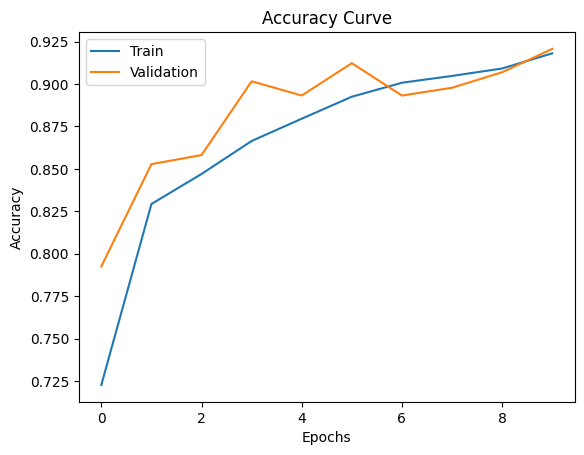

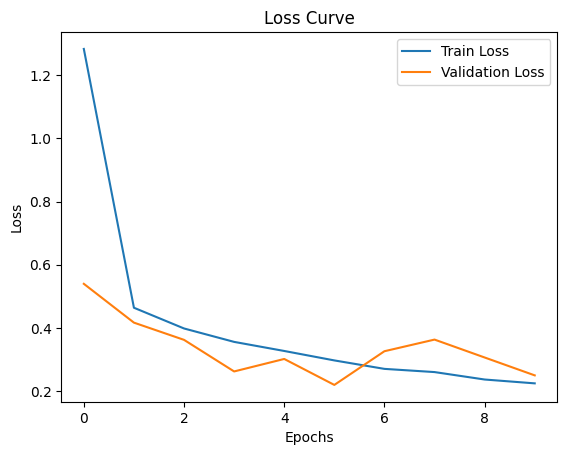

In [6]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")
plt.legend()
plt.show()


# Save model

In [8]:
model.save("brain_tumor_model.h5")
print("Model saved as brain_tumor_model.h5")

Model saved as brain_tumor_model.h5


# RANDOM 25 IMAGE PREDICTION 

In [9]:
import random

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


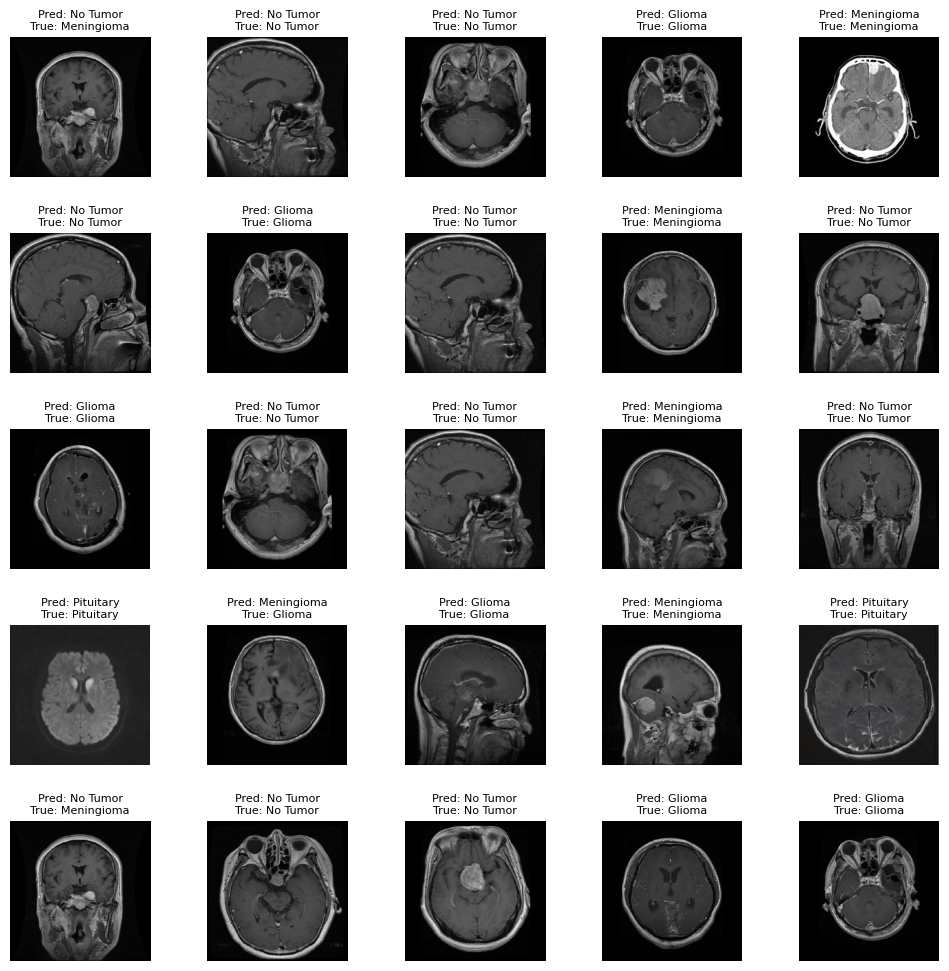

In [10]:
class_names = ['Glioma','Meningioma','Pituitary','No Tumor']

# Load one batch from test data
test_images, test_labels = next(test_data)

# Get predictions for that batch
pred_probs = model.predict(test_images)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(test_labels, axis=1)

L = 5   # rows
W = 5   # columns

fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in range(L * W):
    index = random.randint(0, len(test_images) - 1)

    axes[i].imshow(test_images[index])
    axes[i].set_title(
        "Pred: {}\nTrue: {}".format(
            class_names[pred_classes[index]],
            class_names[true_classes[index]]
        ),
        fontsize=8
    )
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

#

# Predict on New MRI Image

In [7]:
def predict_new_image(img_path):
    """
    Predict the class of a new MRI image
    img_path: path to your new MRI image
    """
    # Load trained model
    model = load_model("brain_tumor_model.h5")

    # Load image
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)
    result_class = class_names[np.argmax(pred)]

    print(f"Prediction for {img_path}: {result_class}")
    return result_class